# Exploratory Data Analisys
The subjects are feature length movies from 1930 to 2016.

In [1]:
% matplotlib inline
import pandas as pd
from pymongo import MongoClient
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
db = MongoClient().imdbws
df = pd.DataFrame(list(db.titles.find({'is_subject': True})))
# Numpy doesn't support MongoDB's Decimal128, let's transform it to Float.
to_decimal = lambda x: float(x.to_decimal()) if 'to_decimal' in dir(x) else x
df['averageRating'] = df['averageRating'].apply(to_decimal)

### Histogram of Movies per Year

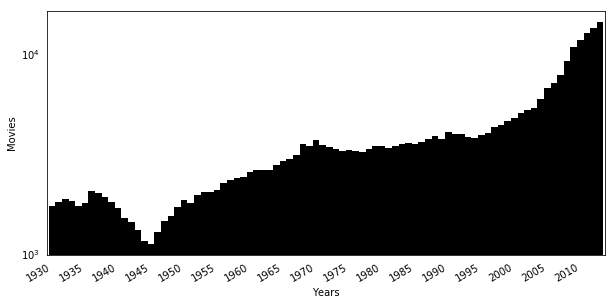

In [2]:
hist = df.groupby(df["startYear"])._id.count()
ax = hist.plot(kind="bar", figsize=(10,5), color='0.0', logy=True, width=1.0)
locator = ax.xaxis.get_major_locator()
locator.locs = locator.locs[::5]
formatter = ax.xaxis.get_major_formatter()
formatter.seq = formatter.seq[::5]
ax.get_figure().autofmt_xdate()
ax.set_ylabel('Movies')
ax.set_xlabel('Years')
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')

### Average Rating per Number of Votes

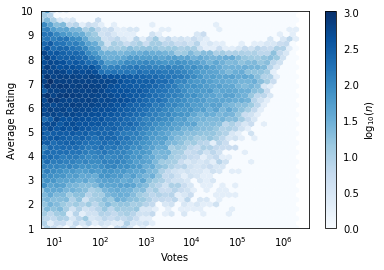

In [4]:
ax = df.plot.hexbin('numVotes', 'averageRating', bins='log', xscale='log',
                    edgecolors='w', linewidths=(0.01,), cmap=plt.cm.Blues,
                    gridsize=40, xlim=5, ylim=(1,10), sharex=False)
ax.set_ylabel('Average Rating')
ax.set_xlabel('Votes')
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
cax = ax.get_figure().get_axes()[1] # Manually gets the colorbar axis.
cax.set_ylabel(r'$\log_{10}(n)$')
cax.tick_params(which='both', right='off')